In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
u = np.random.default_rng().uniform(0,1, 5000)
t = np.random.default_rng().uniform(0, 1, 5000)

In [3]:
def plot_random_variable(random_variable_1, random_variable_2):
    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))    
    
    for ax_1, ax_2, var, name in zip([ax1, ax3], [ax2, ax4], [random_variable_1, random_variable_2], ['u', 't']):
        ax_1.plot(var, 'ob')
        ax_1.set_title(f'Random variable {name}', size=15)
        count, bins, ignored = ax_2.hist(var, 20, density=False)
        ax_2.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax_2.set_title(f'Histogram of the {name} samples and PDF', size=15)

    plt.tight_layout()
    plt.show()

In [4]:
def plot_plackett(thetas: list):
    _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
    axes = [ax1, ax2, ax3]

    for theta, ax in zip(thetas, axes):
        a = t * (1 - t)
        b = theta + a * (theta - 1) ** 2
        c = 2 * a * (u * (theta ** 2) + 1 - u) + theta * (1 - 2 * a)
        d = (theta ** 0.5) * (theta + 4 * a * u * (1 - u) * (1 - theta) ** 2) ** 0.5
        v = (c - (1 - 2 * t) * d) / (2 * b)

        points: list = []
        for i in range(len(u)):
            points.append((u[i], v[i]))

        x, y = zip(*points)
        ax.scatter(x, y)
        ax.set_title(f'theta = {theta}', size=20)
    
    plt.tight_layout()
    plt.show()

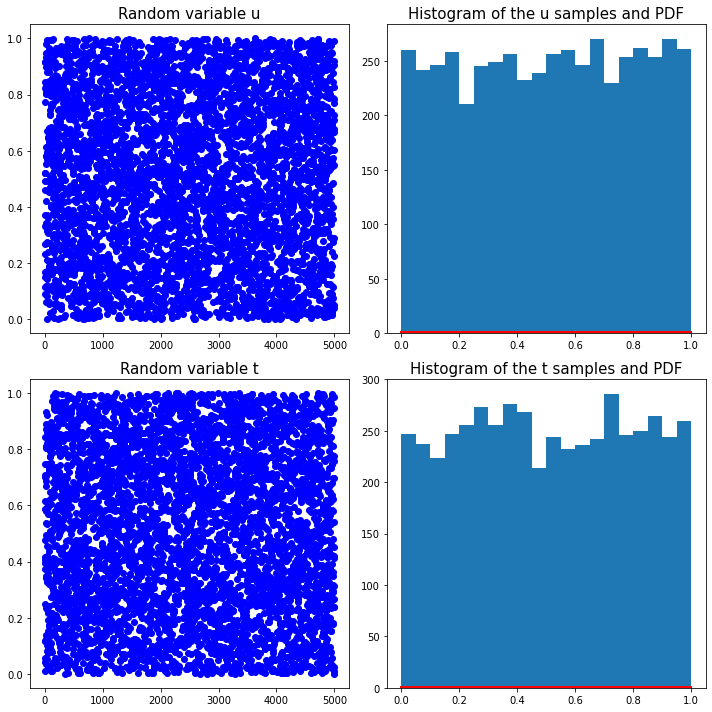

In [5]:
plot_random_variable(u, t)

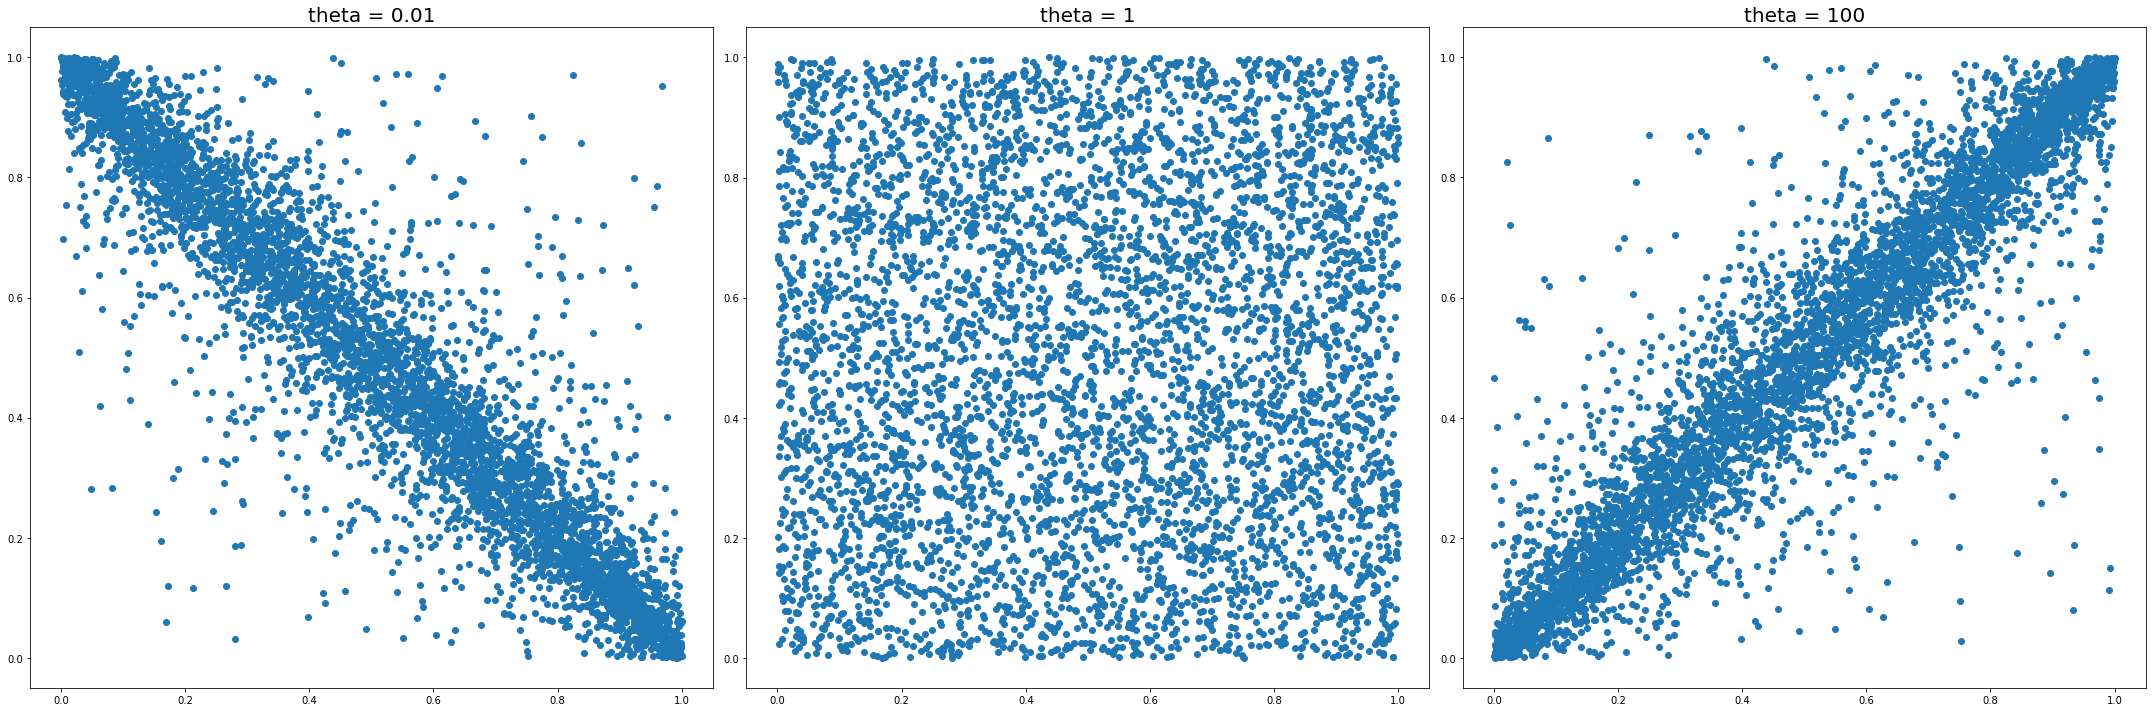

In [6]:
plot_plackett([0.01, 1, 100])